## Load data and packages

In [1]:
# import basic packages

import numpy as np
import os
import time
from dask import dataframe as dd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import vitaldb
import csv
from datetime import datetime, time as datetime_time, timedelta
import glob
import sys
import sklearn.neighbors._base
import vitaldb
import itertools

In [2]:
# Import relevant libraries
import torch
import torch.nn as nn

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import math
import tensorflow as tf
%matplotlib inline
from sklearn.metrics import auc, classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, f1_score, precision_recall_curve
from torch.autograd import Variable

In [3]:
from tslearn.clustering import TimeSeriesKMeans
%matplotlib inline
from tslearn.clustering import silhouette_score
from sklearn.decomposition import PCA

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 8]

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import pandas as pd

In [4]:
# Option to fully display columns and rows
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 300)

In [5]:
# function to get root directory
def getRootDir():
    """
    Get root folder directory
    :return: root folder directory
    :rtype: path
    """
    rootdir = os.path.abspath(os.curdir)

    return rootdir
rootdir = getRootDir()
rootdir

'/Users/tselanna/Desktop/Code'

In [6]:
# Import dataset from hard drive
df = glob.glob(os.path.join(
        rootdir, 'TOSHIBA_HDD/2022_07_15T18_01_25_ANALYSIS_DF_44var.csv'))
df = pd.read_csv(df[0], dtype={"Solar8000/BT": float})

In [7]:
ids = df.caseid.unique()

id = []
len = []
for i in ids:
    x = i
    y = df[df['caseid'] == i].shape[0]
    id.append(x)
    len.append(y)

list = np.vstack((id,len))
len_ids = pd.DataFrame(list).T

len_ids.columns = ['caseid', 'length']
len_ids


,caseid,length
0,1,347
1,21,5882
2,30,5205
3,50,2145
4,57,4940
...,...,...
599,6352,3644
600,6356,10747
601,6358,8945
602,6360,3182


In [10]:
large_ids = len_ids.caseid[len_ids['length'].ge(500)]
large_ids = large_ids.to_list()

print(large_ids)


[21, 30, 50, 57, 62, 88, 109, 116, 124, 133, 135, 140, 166, 192, 194, 196, 207, 211, 220, 224, 230, 238, 239, 243, 269, 305, 313, 320, 323, 329, 351, 446, 459, 465, 476, 483, 487, 489, 498, 503, 517, 525, 534, 535, 548, 551, 569, 581, 591, 600, 606, 608, 612, 613, 616, 618, 651, 653, 664, 681, 687, 696, 707, 739, 755, 780, 782, 799, 801, 808, 820, 830, 832, 851, 859, 865, 873, 898, 924, 927, 930, 939, 958, 965, 966, 975, 978, 982, 1021, 1026, 1081, 1082, 1086, 1088, 1104, 1130, 1134, 1137, 1149, 1155, 1167, 1175, 1189, 1200, 1201, 1207, 1210, 1214, 1232, 1236, 1244, 1255, 1258, 1259, 1308, 1311, 1315, 1316, 1359, 1367, 1378, 1379, 1381, 1401, 1405, 1421, 1422, 1435, 1450, 1453, 1457, 1461, 1467, 1476, 1479, 1483, 1492, 1494, 1499, 1502, 1508, 1510, 1526, 1567, 1568, 1591, 1625, 1655, 1666, 1671, 1694, 1709, 1718, 1721, 1731, 1741, 1742, 1743, 1764, 1766, 1767, 1788, 1792, 1796, 1803, 1813, 1815, 1819, 1824, 1826, 1854, 1859, 1873, 1879, 1880, 1923, 1928, 1934, 1965, 1977, 1993, 2003, 2

In [7]:
allcase = [21, 30, 50, 57, 62, 88, 109, 116, 124, 133, 135, 140, 166, 192, 194, 196, 207, 211, 220, 224, 230, 238, 239, 243, 269, 305, 313, 320, 323, 329, 351, 446, 459, 465, 476, 483, 487, 489, 498, 503, 517, 525, 534, 535, 548, 551, 569, 581, 591, 600, 606, 608, 612, 613, 616, 618, 651, 653, 664, 681, 687, 696, 707, 739, 755, 780, 782, 799, 801, 808, 820, 830, 832, 851, 859, 865, 873, 898, 924, 927, 930, 939, 958, 965, 966, 975, 978, 982, 1021, 1026, 1081, 1082, 1086, 1088, 1104, 1130, 1134, 1137, 1149, 1155, 1167, 1175, 1189, 1200, 1201, 1207, 1210, 1214, 1232, 1236, 1244, 1255, 1258, 1259, 1308, 1311, 1315, 1316, 1359, 1367, 1378, 1379, 1381, 1401, 1405, 1421, 1422, 1435, 1450, 1453, 1457, 1461, 1467, 1476, 1479, 1483, 1492, 1494, 1499, 1502, 1508, 1510, 1526, 1567, 1568, 1591, 1625, 1655, 1666, 1671, 1694, 1709, 1718, 1721, 1731, 1741, 1742, 1743, 1764, 1766, 1767, 1788, 1792, 1796, 1803, 1813, 1815, 1819, 1824, 1826, 1854, 1859, 1873, 1879, 1880, 1923, 1928, 1934, 1965, 1977, 1993, 2003, 2026, 2037, 2038, 2045, 2054, 2068, 2078, 2082, 2094, 2100, 2104, 2105, 2107, 2108, 2109, 2124, 2126, 2190, 2201, 2215, 2220, 2229, 2235, 2242, 2247, 2248, 2255, 2265, 2278, 2302, 2306, 2308, 2316, 2343, 2345, 2346, 2351, 2362, 2363, 2371, 2372, 2373, 2378, 2389, 2407, 2430, 2431, 2448, 2456, 2462, 2470, 2475, 2491, 2496, 2501, 2506, 2517, 2531, 2540, 2549, 2551, 2559, 2565, 2567, 2570, 2580, 2588, 2617, 2630, 2634, 2649, 2707, 2754, 2767, 2773, 2779, 2784, 2792, 2800, 2805, 2813, 2825, 2829, 2834, 2842, 2863, 2881, 2885, 2886, 2921, 2923, 2928, 2930, 2934, 2936, 2937, 2953, 2957, 2989, 3022, 3029, 3039, 3052, 3053, 3059, 3062, 3079, 3110, 3155, 3161, 3163, 3170, 3180, 3183, 3189, 3195, 3213, 3224, 3227, 3234, 3250, 3253, 3254, 3265, 3283, 3285, 3302, 3310, 3314, 3326, 3343, 3356, 3358, 3382, 3397, 3398, 3401, 3413, 3423, 3427, 3431, 3449, 3477, 3480, 3494, 3496, 3512, 3531, 3532, 3535, 3546, 3547, 3552, 3557, 3562, 3597, 3604, 3609, 3621, 3623, 3624, 3638, 3639, 3656, 3670, 3677, 3678, 3684, 3695, 3703, 3704, 3713, 3714, 3724, 3728, 3732, 3735, 3754, 3761, 3764, 3779, 3780, 3786, 3788, 3801, 3808, 3823, 3851, 3874, 3893, 3914, 3918, 3920, 3924, 3933, 3943, 3961, 3982, 3992, 4007, 4028, 4057, 4075, 4087, 4097, 4110, 4114, 4121, 4154, 4158, 4160, 4186, 4225, 4229, 4248, 4249, 4257, 4269, 4288, 4303, 4326, 4334, 4354, 4355, 4363, 4366, 4375, 4378, 4383, 4395, 4432, 4437, 4451, 4456, 4458, 4469, 4482, 4491, 4517, 4531, 4563, 4607, 4608, 4617, 4626, 4627, 4646, 4657, 4670, 4686, 4688, 4691, 4701, 4709, 4711, 4729, 4735, 4759, 4770, 4773, 4783, 4825, 4826, 4829, 4840, 4848, 4850, 4874, 4888, 4897, 4898, 4909, 4912, 4943, 4948, 4962, 4970, 4972, 5011, 5013, 5017, 5020, 5032, 5041, 5046, 5050, 5068, 5086, 5087, 5115, 5128, 5130, 5139, 5140, 5167, 5187, 5196, 5198, 5206, 5211, 5215, 5221, 5229, 5249, 5252, 5263, 5279, 5284, 5293, 5295, 5297, 5318, 5335, 5345, 5361, 5378, 5387, 5395, 5400, 5402, 5423, 5465, 5469, 5494, 5506, 5509, 5516, 5523, 5540, 5555, 5566, 5568, 5570, 5582, 5596, 5600, 5601, 5627, 5631, 5639, 5644, 5658, 5672, 5700, 5716, 5731, 5734, 5737, 5741, 5742, 5756, 5764, 5786, 5798, 5821, 5828, 5834, 5879, 5881, 5888, 5900, 5911, 5913, 5927, 5935, 5949, 5960, 5968, 5984, 6001, 6023, 6036, 6045, 6059, 6112, 6116, 6118, 6123, 6133, 6137, 6146, 6181, 6210, 6214, 6218, 6225, 6226, 6231, 6232, 6241, 6253, 6263, 6265, 6272, 6294, 6316, 6317, 6321, 6325, 6340, 6352, 6356, 6358, 6360, 6385]

In [7]:
onethousand = [21, 30, 50, 57, 62, 88, 109, 133, 135, 140, 166, 192, 194, 196, 207, 211, 220, 224, 230, 238, 239, 305, 313, 320, 323, 329, 351, 446, 459, 465, 476, 483, 487, 489, 498, 503, 517, 525, 534, 548, 569, 581, 591, 600, 606, 608, 613, 618, 651, 653, 664, 681, 696, 707, 780, 782, 799, 801, 808, 820, 832, 851, 859, 865, 873, 898, 924, 927, 930, 965, 966, 975, 978, 982, 1021, 1026, 1081, 1082, 1086, 1104, 1130, 1134, 1137, 1149, 1155, 1167, 1175, 1189, 1207, 1210, 1214, 1244, 1255, 1258, 1259, 1308, 1359, 1367, 1378, 1379, 1381, 1401, 1405, 1421, 1422, 1435, 1450, 1453, 1457, 1461, 1467, 1476, 1479, 1483, 1494, 1499, 1502, 1508, 1510, 1526, 1567, 1568, 1625, 1655, 1671, 1694, 1709, 1718, 1721, 1731, 1741, 1742, 1743, 1764, 1767, 1788, 1792, 1796, 1803, 1813, 1815, 1819, 1824, 1854, 1859, 1873, 1879, 1880, 1923, 1928, 1934, 1977, 2003, 2037, 2038, 2045, 2054, 2078, 2082, 2094, 2100, 2104, 2105, 2107, 2109, 2124, 2126, 2190, 2215, 2220, 2235, 2242, 2247, 2248, 2265, 2278, 2308, 2316, 2343, 2346, 2351, 2362, 2363, 2378, 2407, 2430, 2431, 2448, 2456, 2462, 2470, 2475, 2491, 2496, 2501, 2506, 2531, 2540, 2551, 2565, 2567, 2570, 2580, 2588, 2617, 2634, 2649, 2707, 2754, 2767, 2773, 2784, 2792, 2800, 2805, 2813, 2825, 2834, 2842, 2881, 2885, 2886, 2921, 2923, 2928, 2930, 2934, 2936, 2937, 2953, 2957, 2989, 3022, 3029, 3039, 3052, 3053, 3062, 3155, 3163, 3183, 3195, 3213, 3224, 3227, 3234, 3250, 3253, 3254, 3265, 3283, 3302, 3310, 3314, 3326, 3343, 3356, 3358, 3397, 3423, 3431, 3449, 3477, 3480, 3494, 3496, 3512, 3531, 3546, 3547, 3552, 3557, 3562, 3597, 3604, 3624, 3638, 3639, 3656, 3670, 3684, 3695, 3703, 3713, 3714, 3724, 3735, 3754, 3779, 3780, 3786, 3788, 3801, 3808, 3823, 3851, 3874, 3893, 3914, 3918, 3920, 3933, 3943, 3961, 3982, 3992, 4028, 4057, 4087, 4097, 4110, 4121, 4154, 4158, 4160, 4229, 4248, 4257, 4288, 4303, 4326, 4334, 4354, 4355, 4363, 4366, 4375, 4378, 4383, 4395, 4432, 4451, 4469, 4482, 4491, 4517, 4608, 4617, 4626, 4670, 4688, 4691, 4701, 4709, 4735, 4759, 4770, 4773, 4783, 4829, 4840, 4848, 4850, 4874, 4888, 4898, 4909, 4912, 4948, 4962, 4970, 4972, 5011, 5013, 5017, 5020, 5032, 5041, 5046, 5050, 5086, 5087, 5115, 5128, 5130, 5139, 5140, 5167, 5196, 5206, 5211, 5215, 5229, 5249, 5252, 5263, 5279, 5284, 5318, 5335, 5345, 5361, 5378, 5387, 5400, 5402, 5423, 5465, 5469, 5494, 5506, 5509, 5516, 5523, 5540, 5555, 5570, 5582, 5596, 5600, 5601, 5631, 5639, 5644, 5672, 5700, 5716, 5731, 5734, 5737, 5741, 5742, 5756, 5764, 5786, 5798, 5821, 5828, 5834, 5879, 5881, 5900, 5913, 5927, 5935, 5949, 5960, 5968, 5984, 6001, 6023, 6036, 6045, 6059, 6112, 6118, 6123, 6137, 6146, 6181, 6218, 6225, 6226, 6231, 6232, 6241, 6253, 6263, 6265, 6272, 6294, 6321, 6325, 6340, 6352, 6356, 6358, 6360, 6385]

In [8]:
isin = df.loc[df['caseid'].isin(allcase)]


In [10]:
ids = isin.caseid.unique()
len(ids)


587

In [25]:
g = []
for i in ids:
    x = isin['Solar8000/NIBP_MBP'][isin['caseid'] == i]
    x = x[0:100]
    b = np.array(x)
    g.append(b)
    #print(i,':', len(df[df['caseid'] == i]))
#g.reset_index()
print(g)

[array([147., 147., 147., 147., 147., 147., 147., 147., 147., 147., 147.,
       147., 147., 147., 147., 147., 147., 147., 147., 147., 147., 147.,
       147., 147., 147., 147., 147., 147., 147., 147., 147., 147., 147.,
       147., 147., 147., 147., 147., 147., 147., 147., 147., 147., 147.,
       147., 147., 147., 147., 147., 147., 147., 108., 108., 108., 108.,
       108., 108., 108., 108., 108., 108., 108., 108., 108., 108., 108.,
       108., 108., 108., 108., 108., 108., 108., 108., 108., 108., 108.,
       108., 108., 108., 108., 108., 108., 108., 108., 108., 108.,  93.,
        93.,  93.,  93.,  93.,  93.,  93.,  93.,  93.,  93.,  93.,  93.,
        93.]), array([108., 108., 108., 108., 108., 108., 108., 108., 108., 108., 108.,
       108., 108.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,
        98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,
        98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,
        98.,  98.,  98.,  98.,  98.

In [26]:
len(g)

587

In [27]:
a = pd.DataFrame(g)
c = a.to_numpy()
c.shape

(587, 100)

In [28]:
c[1]

array([108., 108., 108., 108., 108., 108., 108., 108., 108., 108., 108.,
       108., 108.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,
        98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,
        98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,
        98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,  98.,
        64.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,
        64.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,
        64.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,  64.,  78.,
        78.,  78.,  78.,  78.,  78.,  78.,  78.,  78.,  78.,  78.,  78.,
        78.])

In [29]:
X_train = c

print(X_train.shape)


(587, 100)


In [30]:
seed = 0
np.random.seed(seed)
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
sz = X_train.shape[1]

In [31]:
range(len(X_train))

range(0, 587)

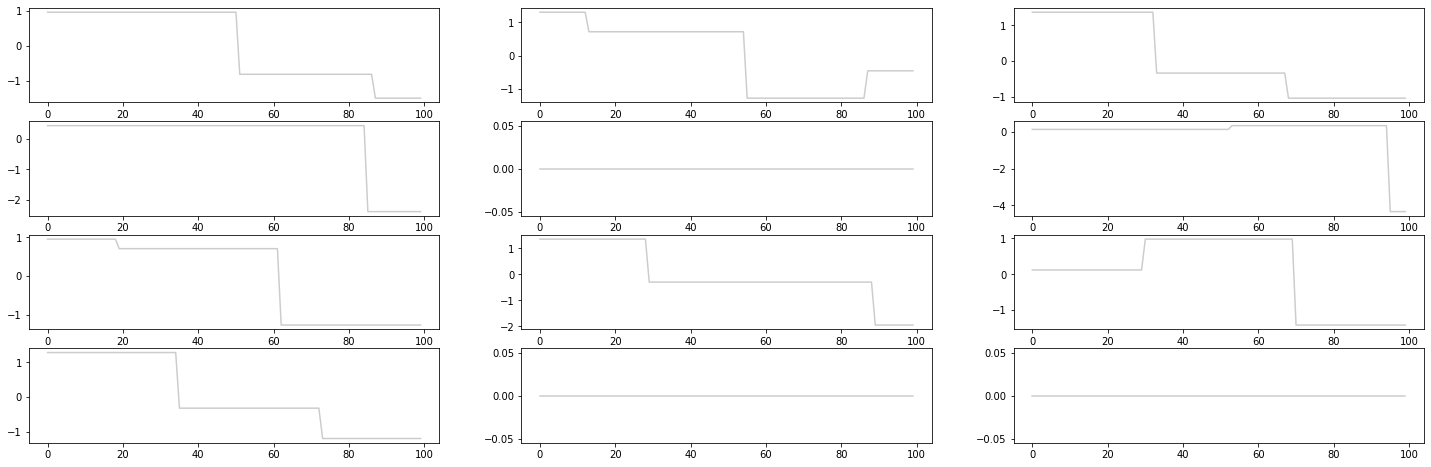

In [32]:
for yi in range(12):
    plt.subplot(4, 3, yi + 1)
    plt.plot(X_train[yi].ravel(), "k-", alpha=.2)
#     plt.text(0.55, 0.85,'Class Label: %d' % (y_train[yi]))

In [33]:
Sum_of_squared_distances = []
K = range(2,8)
for k in K:
    km = TimeSeriesKMeans(n_clusters=k,
                          n_init=2,
                          metric="dtw",
                          verbose=False,
                          max_iter_barycenter=10,
                          random_state=0)
    
    km = km.fit(X_train)
    Sum_of_squared_distances.append(km.inertia_)

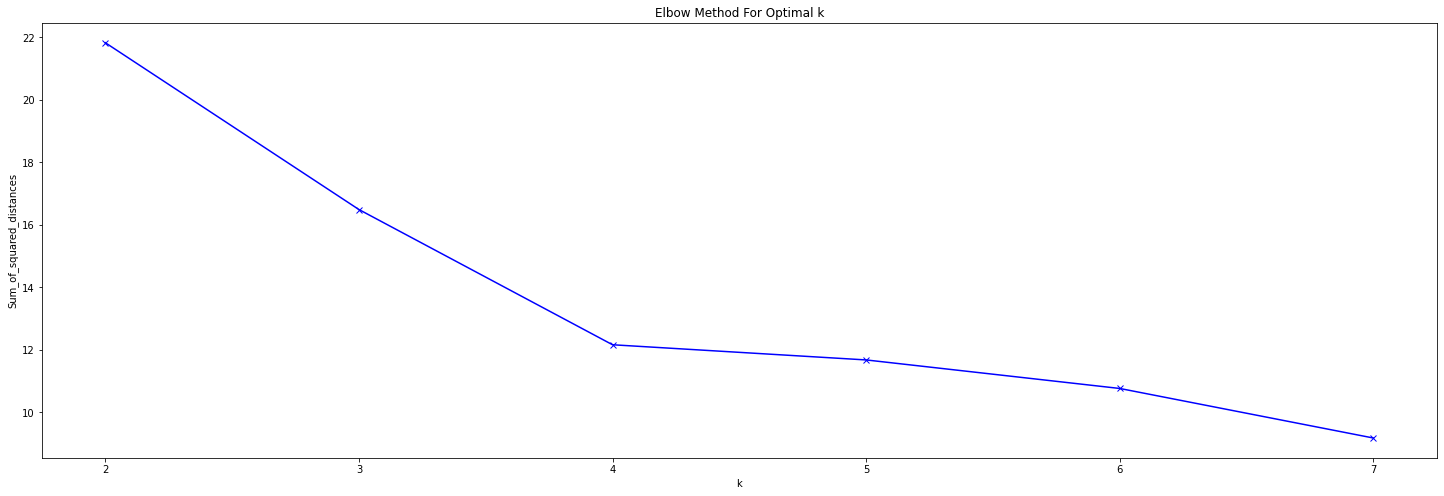

In [34]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [42]:
train_pca = X_train.reshape(X_train.shape[0], X_train.shape[1])
train_pca = train_pca.tolist()
train_pca

[[0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.9581477335658641,
  0.958147

list cluster number: 2
     caseid  cluster
0        21        0
1        30        0
2        50        0
3        57        0
4        62        1
..      ...      ...
582    6352        0
583    6356        1
584    6358        1
585    6360        0
586    6385        0

[587 rows x 2 columns]
For n_clusters = 2 The average silhouette_score is : 0.48
list cluster number: 3
     caseid  cluster
0        21        2
1        30        2
2        50        2
3        57        0
4        62        1
..      ...      ...
582    6352        2
583    6356        1
584    6358        1
585    6360        2
586    6385        0

[587 rows x 2 columns]
For n_clusters = 3 The average silhouette_score is : 0.29
list cluster number: 4
     caseid  cluster
0        21        1
1        30        1
2        50        1
3        57        3
4        62        0
..      ...      ...
582    6352        1
583    6356        2
584    6358        0
585    6360        1
586    6385        3

[587 rows 

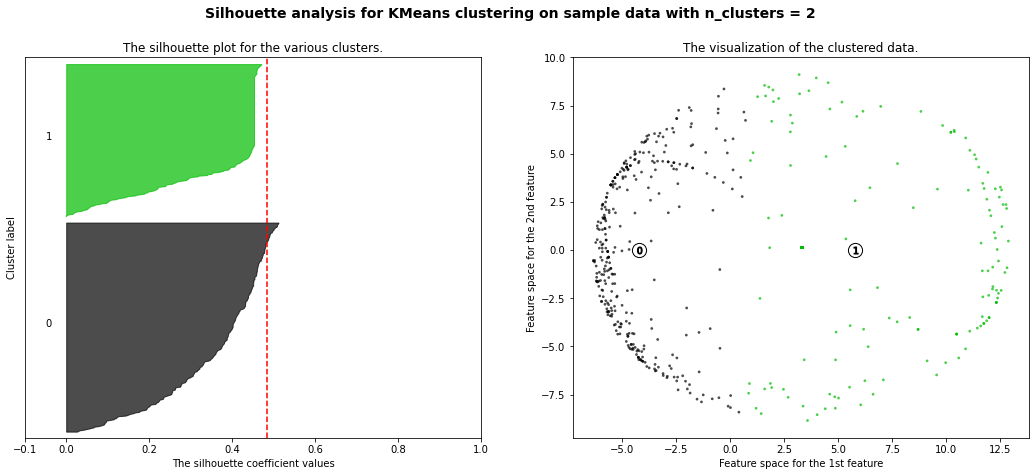

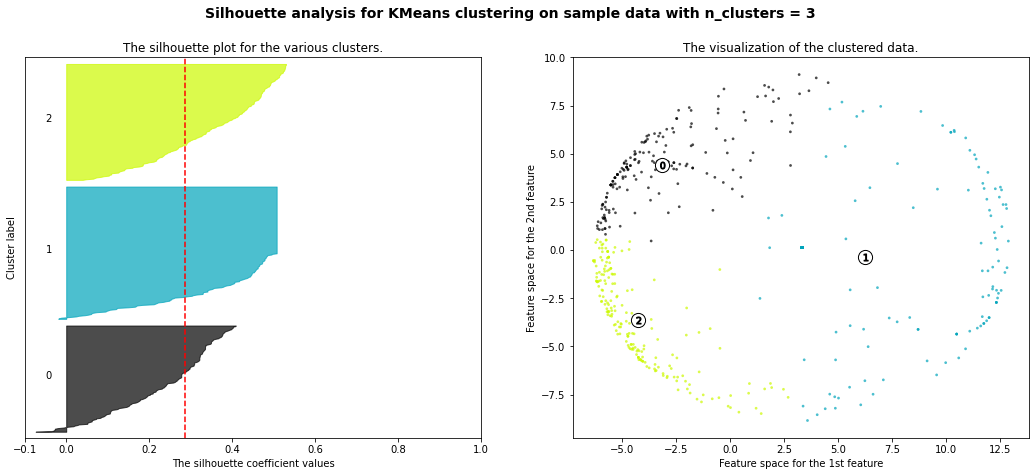

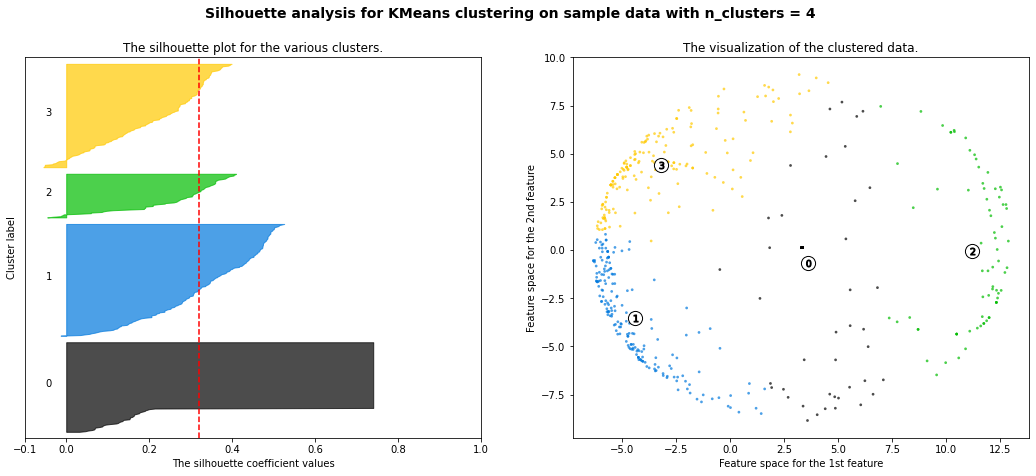

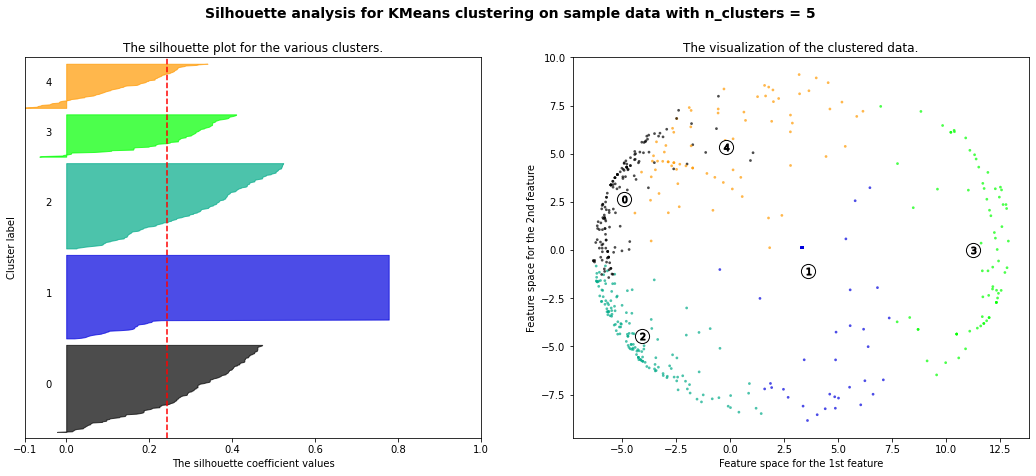

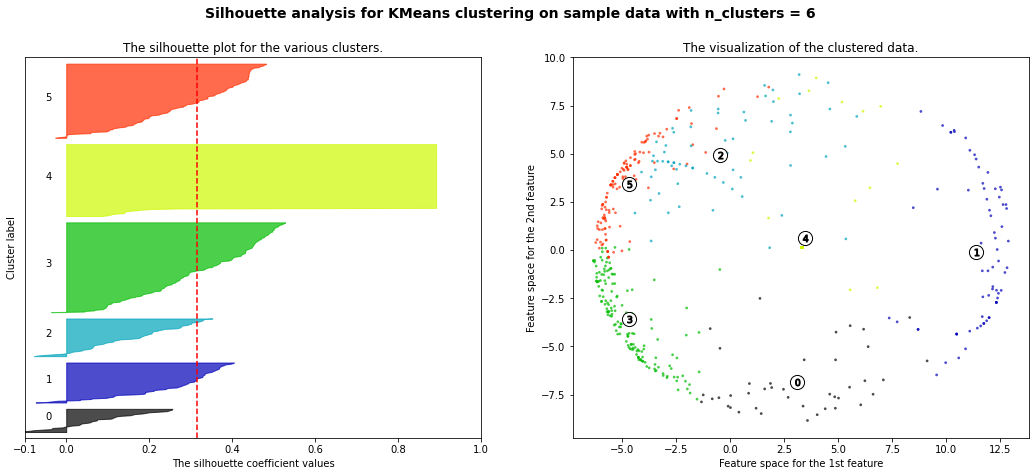

In [43]:

train_pca = X_train.reshape(X_train.shape[0], X_train.shape[1])
train_pca = train_pca.tolist()
pca = PCA(n_components=0.95)
train_pca = pca.fit_transform(train_pca)

X = train_pca

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    list = np.vstack((ids, cluster_labels))
    list = pd.DataFrame(list).T
    list.columns = ['caseid', 'cluster']
    print('list cluster number:', n_clusters)
    print(list)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is : {:.2f}"
        .format(silhouette_avg),
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


Euclidean k-means
Euclidean silhoutte: 0.32


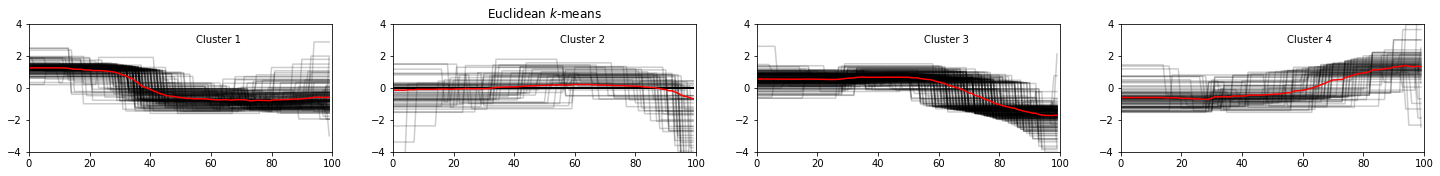

In [44]:
# Euclidean k-means

cluster = 4
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters= cluster, verbose=False, random_state=seed)
y_pred_km = km.fit_predict(X_train)


print("Euclidean silhoutte: {:.2f}".format(silhouette_score(X_train, y_pred_km, metric="euclidean")))

plt.figure()
for yi in range(cluster):
    plt.subplot(3, cluster, yi + 1)
    for xx in X_train[y_pred_km == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

In [27]:
list_eucl = np.vstack((ids, y_pred_km))
list_eucl = pd.DataFrame(list_eucl).T
list_eucl.columns = ['caseid', 'cluster']
print('list cluster number:', 3)
print(list_eucl)

list cluster number: 3
     caseid  cluster
0        21        0
1        30        0
2        50        0
3        57        0
4        62        2
..      ...      ...
464    6352        0
465    6356        1
466    6358        2
467    6360        0
468    6385        0

[469 rows x 2 columns]


DBA k-means
DBA silhoutte: 0.33


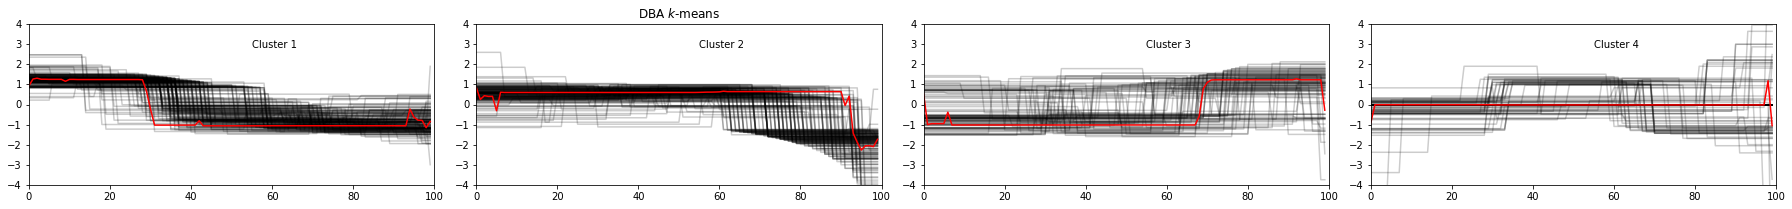

In [47]:
# DBA-k-means
cluster = 4
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters= cluster,
                          n_init=2,
                          metric="dtw",
                          verbose=False,
                          max_iter_barycenter=10,
                          random_state=seed)
y_pred_dba_km = dba_km.fit_predict(X_train)
print("DBA silhoutte: {:.2f}".format(silhouette_score(X_train, y_pred_dba_km, metric="dtw")))

for yi in range(cluster):
    plt.subplot(3, cluster, yi+1)
    for xx in X_train[y_pred_dba_km == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")
        


plt.tight_layout()
plt.show()

In [49]:
list_dba = np.vstack((ids, y_pred_dba_km))
list_dba = pd.DataFrame(list_dba).T
list_dba.columns = ['caseid', 'cluster']
# print('list cluster number:', n_clusters)
print(list_dba)

     caseid  cluster
0        21        0
1        30        0
2        50        0
3        57        1
4        62        3
..      ...      ...
582    6352        0
583    6356        3
584    6358        3
585    6360        0
586    6385        1

[587 rows x 2 columns]


In [50]:
list_dba_cluster_one = list_dba.caseid[list_dba['cluster'].eq(0)]
list_dba_cluster_two = list_dba.caseid[list_dba['cluster'].eq(1)]
list_dba_cluster_three = list_dba.caseid[list_dba['cluster'].eq(2)]
list_dba_cluster_four = list_dba.caseid[list_dba['cluster'].eq(3)]
print(len(list_dba_cluster_one))
print(len(list_dba_cluster_two))
print(len(list_dba_cluster_three))
print(len(list_dba_cluster_four))


169
157
92
169


In [51]:
cluster_one = list_dba_cluster_one.to_numpy()
cluster_two = list_dba_cluster_two.to_numpy()
cluster_three = list_dba_cluster_three.to_numpy()
cluster_four = list_dba_cluster_four.to_numpy()

In [52]:
cluster_one

array([  21,   30,   50,  116,  133,  207,  220,  238,  239,  243,  269,
        313,  320,  323,  329,  459,  476,  487,  489,  606,  696,  782,
        832,  865,  927,  930,  939,  965,  978, 1021, 1104, 1137, 1236,
       1244, 1405, 1492, 1494, 1499, 1502, 1508, 1591, 1666, 1718, 1741,
       1764, 1767, 1826, 1965, 2082, 2094, 2201, 2247, 2248, 2302, 2306,
       2308, 2363, 2371, 2431, 2462, 2549, 2588, 2617, 2634, 2779, 2792,
       2800, 2863, 2881, 2928, 2934, 2936, 2937, 2957, 3052, 3059, 3161,
       3183, 3195, 3227, 3283, 3326, 3356, 3358, 3431, 3449, 3494, 3496,
       3532, 3546, 3557, 3562, 3597, 3670, 3714, 3732, 3754, 3761, 3780,
       3823, 3851, 3918, 3920, 3924, 3933, 4028, 4154, 4160, 4248, 4257,
       4303, 4354, 4363, 4366, 4378, 4517, 4657, 4670, 4691, 4709, 4773,
       4829, 4840, 4848, 4897, 4898, 4970, 4972, 5011, 5017, 5086, 5128,
       5187, 5196, 5198, 5211, 5263, 5297, 5318, 5345, 5400, 5465, 5494,
       5523, 5555, 5631, 5644, 5731, 5734, 5756, 57

In [53]:
cluster_two

array([  57,   88,  109,  192,  196,  305,  483,  517,  525,  534,  548,
        551,  591,  608,  651,  653,  664,  681,  687,  739,  799,  801,
        851,  859,  898,  958,  966,  975,  982, 1026, 1130, 1134, 1149,
       1155, 1175, 1189, 1210, 1311, 1315, 1367, 1378, 1435, 1450, 1453,
       1457, 1510, 1526, 1731, 1742, 1796, 1815, 1879, 1977, 2068, 2100,
       2126, 2220, 2343, 2372, 2389, 2430, 2456, 2491, 2559, 2565, 2570,
       2649, 2754, 2773, 2825, 2885, 2886, 2923, 3039, 3053, 3155, 3170,
       3250, 3253, 3254, 3310, 3314, 3397, 3401, 3423, 3552, 3604, 3609,
       3639, 3684, 3703, 3724, 3728, 3786, 3914, 3943, 3961, 3982, 3992,
       4007, 4075, 4087, 4097, 4110, 4114, 4121, 4225, 4249, 4383, 4456,
       4458, 4469, 4531, 4563, 4608, 4627, 4686, 4711, 4783, 4826, 4912,
       5020, 5046, 5068, 5115, 5130, 5167, 5206, 5229, 5279, 5293, 5361,
       5423, 5506, 5509, 5516, 5582, 5596, 5600, 5627, 5639, 5672, 5716,
       5786, 5821, 5927, 5949, 6023, 6036, 6045, 61

In [54]:
cluster_three

array([ 211,  224,  230,  498,  569,  618,  707,  755,  780, 1082, 1086,
       1255, 1421, 1422, 1467, 1479, 1567, 1694, 1788, 1792, 1813, 1880,
       1928, 2038, 2045, 2078, 2190, 2215, 2229, 2255, 2265, 2345, 2346,
       2351, 2378, 2407, 2506, 2517, 2531, 2540, 2567, 2767, 2813, 3022,
       3189, 3224, 3234, 3285, 3477, 3531, 3677, 3678, 3788, 4229, 4288,
       4326, 4334, 4355, 4375, 4395, 4617, 4626, 4646, 4688, 4729, 4735,
       4759, 4825, 4909, 4943, 4948, 5013, 5032, 5041, 5284, 5335, 5387,
       5469, 5540, 5566, 5601, 5700, 5879, 5911, 5913, 5960, 5968, 6059,
       6133, 6218, 6232, 6316])

In [55]:
cluster_four

array([  62,  124,  135,  140,  166,  194,  351,  446,  465,  503,  535,
        581,  600,  612,  613,  616,  808,  820,  830,  873,  924, 1081,
       1088, 1167, 1200, 1201, 1207, 1214, 1232, 1258, 1259, 1308, 1316,
       1359, 1379, 1381, 1401, 1461, 1476, 1483, 1568, 1625, 1655, 1671,
       1709, 1721, 1743, 1766, 1803, 1819, 1824, 1854, 1859, 1873, 1923,
       1934, 1993, 2003, 2026, 2037, 2054, 2104, 2105, 2107, 2108, 2109,
       2124, 2235, 2242, 2278, 2316, 2362, 2373, 2448, 2470, 2475, 2496,
       2501, 2551, 2580, 2630, 2707, 2784, 2805, 2829, 2834, 2842, 2921,
       2930, 2953, 2989, 3029, 3062, 3079, 3110, 3163, 3180, 3213, 3265,
       3302, 3343, 3382, 3398, 3413, 3427, 3480, 3512, 3535, 3547, 3621,
       3623, 3624, 3638, 3656, 3695, 3704, 3713, 3735, 3764, 3779, 3801,
       3808, 3874, 3893, 4057, 4158, 4186, 4269, 4432, 4437, 4451, 4482,
       4491, 4607, 4701, 4770, 4850, 4874, 4888, 4962, 5050, 5087, 5139,
       5140, 5215, 5221, 5249, 5252, 5295, 5378, 53